<h1 align="center">Data Science ISE</h1>
<h2 align="center">Tutorial on Dimensionality Reduction using PCA and Autoencoders</h2>
<h3 align="center">Group L</h3>

Members:<br>
Ojasa Chitre (2018130007)<br>
Arka Haldi (2018130014)

## Introduction

This tutorial will give you an understanding of Dimensionality Reduction and how the methods of PCA and Autoencoders can be used for it and their difference. 

###What is the Curse of Dimensionality?
Data grows by the day. More and more advanced and large datasets are being formed. The dimensions of a data are the number of features that are used to describe that data. Some of the risks of a larger data are:
1. Overfitting:<br>
Larger data can lead to overfitting of a model. Overfitting refers to the scenalrio where a model is too specific to its training data and does not generalise well for new incoming data. This can lead to poorer performance of the model.

2. More similarity in data:<br>
With lesser data there is a higher chance that there is a proper distinction between the data-points, leading to better distinction between different classes of data. Since the hyperdimensional space remains the same more distinct data points are packed in the same space which means there will be lesser distance/distinction between the different classes in the data.

3. Larger Compute time:<br>
There is a simple correlation between the size of data and the amount of time needed to compute it. Each and every algorithm's compute time is dependent on the size of data that is being given to it. But the world of technology requires speed of operation. Hence, it becomes imperative to try and reduce the amount of data present.

###What is Dimensionality Reduction?
To counter the Curse of Dimensionality the technique of Dimensionality reduction is used. It basically emplys various methods to reduce the number of features used in a dataset in order to reduce the feature space. In theory we can do this by Feature Selection or Feature Transformation. In this tutorial we will be focussing on Feature Transformation, specifically on PCA and Autoencoders. Feature Transformation entails projecting high dimensional features to a lower dimensional level.

###What is PCA?
Principal Component Analysis(PCA) is the technique of projecting data onto a direction with higher variance. Mathmatically the directions that have high variance are orthogonal to one another meaning they have nearly 0 correlation. PCA is a linear transformation of data. In more mathematical terms it is a line/plane that is a least sqaure approximation of a the data with maximum variance.

[<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1200px-GaussianScatterPCA.svg.png" width="240" height="240" >](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1200px-GaussianScatterPCA.svg.png)

###What are Autoencoders?
Autoencoders are artificial neural network that essentially compresses the data. They reduce dimensions by stacking multiple non-linear layers. The data is reduced to a lower dimensional latent space. 

[<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/Autoencoder_structure.png/350px-Autoencoder_structure.png">](https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/Autoencoder_structure.png/350px-Autoencoder_structure.png)

## Tutorial content

In this tutorial we will show you how to use PCA and Autoencoders for dimensionality reduction. We will also understand how the output is different for both these methods. The data we are using here is the Mnist dataset available for image processing.

The topics we will be covering here are:
1. Installing Libraries
2. MNIST Dataset
3. Loading Data
4. Model without Reduction (Base Model)
5. Autoencoders
6. PCA
7. Summary and references

##Installing Libraries

Here we are importing some basic libraries. The most important of these are the keras library that we will be using for building the Autoencoder and the PCA library. 

In [ ]:
!pip install numpy_indexed

In [ ]:
import sys
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, recall_score, precision_score, f1_score

import keras
from keras import callbacks
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense

import torch
import torch.nn as nn
import torch.utils.data

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from prettytable import PrettyTable

import time

import warnings
warnings.filterwarnings('ignore')

# MNIST dataset

In this section, we compare the accuracy of classification in 8 cases, and attempt to validate our hypothesis that AutoEncoders can handle feature reduction of non-linear datasets better.

1. 784 (all)features classified using LogisticRegressor
2. 32 features using AutoEncoders, classified with LogisticRegression
3. 32 features using Deeper AutoEncoder, classified using LogisticRegression
4. 64 features using Deeper AutoEncoder, classified using LogisticRegression
5. 128 features using Deeper AutoEncoder, classified using LogisticRegression
6. 32 features using PCA, classified with LogisticRegression
7. 64 features using PCA, classified using LogisticRegression
8. 128 features using PCA, classified using LogisticRegression

### Loading data

Since we are using the mnist dataset we use the load_data function of the keras.datasets. It directly give us data with a test train. 

In [ ]:
from keras.datasets import mnist

Here we are defining the loggers so that we can view our results in a proper tabular format.

In [ ]:
accuracy_logger = PrettyTable()
accuracy_logger.field_names = ["Sno.","Method", "Accuracy Score", "Recall Score", "Precision Score", "F1 Score"]

In [ ]:
rloss_logger = PrettyTable()
rloss_logger.field_names = ["Sno.", "Method", "Reconstruction RMSE loss"]

Exploring the dataset

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
print(
f'''Shape of Train Data: {X_train.shape}
Shape of Test Data: {X_test.shape}
Shape of Train Target: {y_train.shape}
Shape of Test Target: {y_test.shape}''')
y_train

Shape of Train Data: (60000, 28, 28)
Shape of Test Data: (10000, 28, 28)
Shape of Train Target: (60000,)
Shape of Test Target: (10000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

*   Exploring the shape of X, we see that it's array of 2d arrays, which we flatten to get finally 784 features for each input image of number
*   Exploring the shape of y, we see that it's simple array of numbers(actual letters written), we keep this unchanged
* 0-255 => 0-1 


In [ ]:
X_train = np.reshape(X_train,(60000,784))
X_test = np.reshape(X_test,(10000,784))

X_train = X_train/255
X_test = X_test/255
print(
f'''Shape of Train Data: {X_train.shape}
Shape of Test Data: {X_test.shape}
Shape of Train Target: {y_train.shape}
Shape of Test Target: {y_test.shape}''')

Shape of Train Data: (60000, 784)
Shape of Test Data: (10000, 784)
Shape of Train Target: (60000,)
Shape of Test Target: (10000,)


In [ ]:
df = pd.DataFrame(y_train, columns=["val"])
df.value_counts()

val
1      6742
7      6265
3      6131
2      5958
9      5949
0      5923
6      5918
8      5851
4      5842
5      5421
dtype: int64

In [ ]:
df = pd.DataFrame(y_test, columns=["val"])
df.value_counts()

val
1      1135
2      1032
7      1028
3      1010
9      1009
4       982
0       980
8       974
6       958
5       892
dtype: int64

## 1. Classify without any feature reduction

To compare any model's improving performance we need to establish a base model. Here for as base model we are using Logistic Regression on data with 784 features(flattened from 28,28). This is the full size of the data hence we expect it to have the most accuracy since the more data means more variations. And when model trains on more variations it adapts better to incoming data. 

In [ ]:
model = LogisticRegression() # define the model
model.fit(X_train, y_train) # fit the model on the training set

LogisticRegression()

In [ ]:
yhat = model.predict(X_test) # make predictions on the test set
acc = accuracy_score(y_test, yhat)
recall = recall_score(y_test, yhat, average = 'micro')
precision = precision_score(y_test, yhat, average = 'micro')
f1 = f1_score(y_test, yhat, average = 'micro')

In [ ]:
accuracy_logger.add_row([1,"784 (all)features", acc, recall, precision, f1])
print(accuracy_logger)

+------+-------------------+----------------+--------------+-----------------+----------+
| Sno. |       Method      | Accuracy Score | Recall Score | Precision Score | F1 Score |
+------+-------------------+----------------+--------------+-----------------+----------+
|  1   | 784 (all)features |     0.9258     |    0.9258    |      0.9258     |  0.9258  |
+------+-------------------+----------------+--------------+-----------------+----------+


## AutoEncoders

## 2. Single layer AE32

If we don’t impose any non-linearity in network then Autoencoder and PCA are almost similar results. Typically non-linearity happends due to the activation and the stacking of multiple layers. In this case since we have a single layer with relu activation non-linearity is not used.

In [ ]:
encoding_dim = 32 

input_img = Input(shape=(784,)) # Input layer
encoded = Dense(encoding_dim, activation='relu')(input_img) # "encoded" is the encoded representation of the input
decoded = Dense(784, activation='sigmoid')(encoded) # "decoded" is the lossy reconstruction of the input
autoencoder = Model(input_img, decoded)# this model maps an input to its reconstruction
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


Let us understand the compiling parameters. 
Optimizer we have used is adadelta which is basically a stochastic gradient descent. Binary Cross Entropy uses the predicted probabilities for a class and then penalises based on the distance from the actual class.

In [ ]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Now, we will train the model on our train data and use the test data as validation set.

In [ ]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
autoencoder.fit(X_train, 
                X_train, 
                epochs=100, 
                batch_size=128, 
                shuffle=True,
                validation_data=(X_test,X_test),
                callbacks =[earlystopping])

Epoch 1/100
469/469 [==============================] - 4s 6ms/step - loss: 0.6930 - val_loss: 0.6928
Epoch 2/100
469/469 [==============================] - 3s 5ms/step - loss: 0.6926 - val_loss: 0.6924
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.6921 - val_loss: 0.6919
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.6917 - val_loss: 0.6915
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.6912 - val_loss: 0.6910
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.6908 - val_loss: 0.6906
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.6903 - val_loss: 0.6901
Epoch 8/100
469/469 [==============================] - 1s 3ms/step - loss: 0.6899 - val_loss: 0.6896
Epoch 9/100
469/469 [==============================] - 1s 3ms/step - loss: 0.6894 - val_loss: 0.6892
Epoch 10/100
469/469 [==============================] - 1s 3ms/step - loss: 0.6889 - val_lo

Since Autoencoders are also used for encoding and decoding, let us see how the reconstruction process is done and how different types of AE networks have different recontructions.

In [ ]:
reconstruction = autoencoder.predict(X_test) # Predict original from encoded 32 wts
reconstruction.shape

(10000, 784)

###Calculation of reconstruction loss 


TEST DATA AS INPUT:


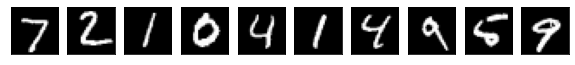

Reconstructed Image:


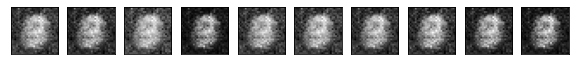

In [ ]:
n = 10  # how many digits we will display

print("TEST DATA AS INPUT:")
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print("Reconstructed Image:")
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(reconstruction[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Calculating the Reconstruction Loss
loss = mean_squared_error(X_test, reconstruction, squared=False)
rloss_logger.add_row([1,"32 features using AutoEncoders", loss])
print(rloss_logger)

+------+--------------------------------+--------------------------+
| Sno. |             Method             | Reconstruction RMSE loss |
+------+--------------------------------+--------------------------+
|  1   | 32 features using AutoEncoders |   0.27144135456914786    |
+------+--------------------------------+--------------------------+


In [ ]:
#this model maps an input to its encoded representation
encoder = Model(input_img, encoded) # Building the encoder from trained AE
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


Training with Basic Autoencoder

In [ ]:
X_train_encode = encoder.predict(X_train) # encode the train data
X_test_encode = encoder.predict(X_test) # encode the test data

### Logistic Regression



In [ ]:
model = LogisticRegression() # define the model
model.fit(X_train_encode, y_train) # fit the model on the training set
yhat = model.predict(X_test_encode) # make predictions on the test set
acc = accuracy_score(y_test, yhat)
recall = recall_score(y_test, yhat, average = 'micro')
precision = precision_score(y_test, yhat, average = 'micro')
f1 = f1_score(y_test, yhat, average = 'micro')
accuracy_logger.add_row([2,"32 features using AutoEncoders", acc,  recall, precision, f1])
print(accuracy_logger)

+------+--------------------------------+----------------+--------------+-----------------+----------+
| Sno. |             Method             | Accuracy Score | Recall Score | Precision Score | F1 Score |
+------+--------------------------------+----------------+--------------+-----------------+----------+
|  1   |       784 (all)features        |     0.9258     |    0.9258    |      0.9258     |  0.9258  |
|  2   | 32 features using AutoEncoders |     0.7046     |    0.7046    |      0.7046     |  0.7046  |
+------+--------------------------------+----------------+--------------+-----------------+----------+


In [ ]:
class_names = [str(x) for x in range(10)]
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Text(0.5, 1.0, 'Confusion matrix for 32 features using AutoEncoders')

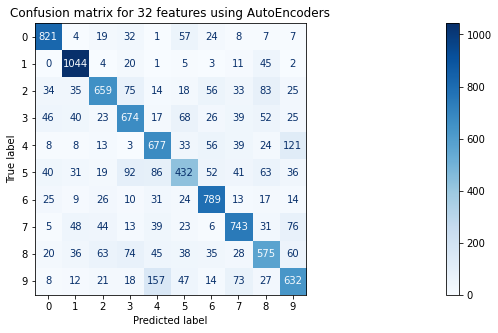

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,5)

class_names = [str(x) for x in range(10)]

disp = ConfusionMatrixDisplay.from_estimator(model,X_test_encode,y_test,display_labels=class_names,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix for 32 features using AutoEncoders")

## 3. Building a deeper AutoEncoder
Autoencoders work by stacking convolutional layers. We tried with only a single layer neural network. Now, let us look at how the result is affected if we have a denser AE.

![deeper](https://miro.medium.com/max/1400/1*C6Z6i1_2EJn13jVEsAOkRQ.png)

## Autoencoder - 32 output features
Here, we consider a AE which has 3 layers. All of the layers of encoding have ReLu activation function. We go from 784 features as the input to a input layer that has 128 outputs, these hidden 128 outputs are given to the 2nd layer with an 64 outputs and finally a output layer for the encoder with 32 features of the final data.

In [ ]:
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)# <-- bottleneck

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 784)               1011

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
autoencoder.fit(X_train,X_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test,X_test),
                callbacks =[earlystopping])

Epoch 1/100
469/469 [==============================] - 3s 4ms/step - loss: 0.2040 - val_loss: 0.1421
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1307 - val_loss: 0.1200
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1167 - val_loss: 0.1114
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1104 - val_loss: 0.1061
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1056 - val_loss: 0.1026
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1021 - val_loss: 0.0994
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0994 - val_loss: 0.0974
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0972 - val_loss: 0.0954
Epoch 9/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0954 - val_loss: 0.0939
Epoch 10/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0940 - val_lo

### Reconstruction

We saw that reconstruction with simply a single layer AE. Now let us see what we get with a denser AE.

TEST DATA AS INPUT:


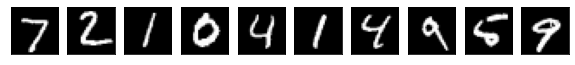

Reconstructed Image:


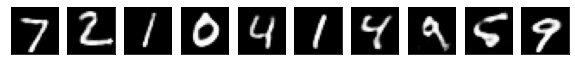

In [ ]:
import matplotlib.pyplot as plt
reconstruction = autoencoder.predict(X_test)
n = 10  # how many digits we will display
print("TEST DATA AS INPUT:")
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print("Reconstructed Image:")

plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(reconstruction[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

We can see with a denser AE the reconstruction is much better.

In [ ]:
# Calculating the Reconstruction Loss
loss = mean_squared_error(X_test, reconstruction, squared=False)
rloss_logger.add_row([2,"32 features using Deeper AutoEncoders", loss])
print(rloss_logger)

+------+---------------------------------------+--------------------------+
| Sno. |                 Method                | Reconstruction RMSE loss |
+------+---------------------------------------+--------------------------+
|  1   |     32 features using AutoEncoders    |   0.27144135456914786    |
|  2   | 32 features using Deeper AutoEncoders |   0.06131296602409017    |
+------+---------------------------------------+--------------------------+


Now we can observe that the RMSE score has gone down for the Deeper Autoencoders.

Let us create the encoder with the encoder part of the AE.

In [ ]:
encoder = Model(input_img, encoded) # Building the encoder from trained AE
encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train_encode = encoder.predict(X_train) # encode the train data
X_test_encode = encoder.predict(X_test) # encode the test data

###Logistic Regression

In [ ]:
model = LogisticRegression() # define the model
model.fit(X_train_encode, y_train) # fit the model on the training set
yhat = model.predict(X_test_encode) # make predictions on the test set
acc = accuracy_score(y_test, yhat)
recall = recall_score(y_test, yhat, average = 'micro')
precision = precision_score(y_test, yhat, average = 'micro')
f1 = f1_score(y_test, yhat, average = 'micro')
accuracy_logger.add_row([3,"32 features using Deeper AutoEncoders", acc,  recall, precision, f1])
print(accuracy_logger)

+------+---------------------------------------+----------------+--------------+-----------------+----------+
| Sno. |                 Method                | Accuracy Score | Recall Score | Precision Score | F1 Score |
+------+---------------------------------------+----------------+--------------+-----------------+----------+
|  1   |           784 (all)features           |     0.9258     |    0.9258    |      0.9258     |  0.9258  |
|  2   |     32 features using AutoEncoders    |     0.7046     |    0.7046    |      0.7046     |  0.7046  |
|  3   | 32 features using Deeper AutoEncoders |     0.9011     |    0.9011    |      0.9011     |  0.9011  |
+------+---------------------------------------+----------------+--------------+-----------------+----------+


Text(0.5, 1.0, 'Confusion matrix for 32 features using Deeper AutoEncoders')

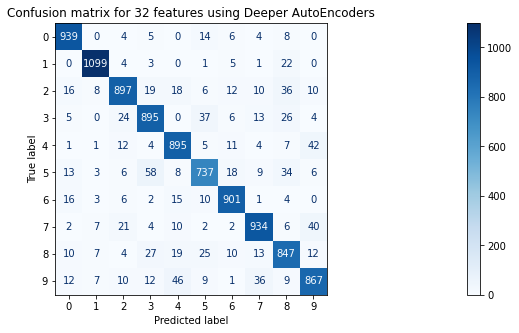

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,5)

class_names = [str(x) for x in range(10)]

disp = ConfusionMatrixDisplay.from_estimator(model,X_test_encode,y_test,display_labels=class_names,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix for 32 features using Deeper AutoEncoders")

When we compare the Accuracy we get a better accuracy than the single layer because our AE is now better tuned for the our data.

## 4. Autoencoder - 64 output features
Here, we consider a AE which has 3 layers. All of the layers of encoding have ReLu activation function. We go from 784 features as the input to a input layer that has 256 outputs, these hidden 256 outputs are given to the 2nd layer with an 128 outputs and finally a output layer for the encoder with 64 features of the final data.

In [ ]:
input_img = Input(shape=(784,))

encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded) # <-- bottleneck

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 256)               33024     
                                                                 
 dense_13 (Dense)            (None, 784)               2014

We will now compile the model with a adam optimizer. It uses 2 gradient descent methods, Momentum and Root Mean Square Propagation.

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
autoencoder.fit(X_train,X_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test,X_test),
                callbacks=[earlystopping])

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1771 - val_loss: 0.1155
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1087 - val_loss: 0.1007
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0982 - val_loss: 0.0943
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0929 - val_loss: 0.0901
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0894 - val_loss: 0.0870
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0868 - val_loss: 0.0851
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0848 - val_loss: 0.0833
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0832 - val_loss: 0.0821
Epoch 9/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0820 - val_loss: 0.0809
Epoch 10/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0810 - val_lo

### Reconstruction

We saw that reconstruction with simply a single layer AE and a denser AE. Now let us try with 64 features.

TEST DATA AS INPUT:


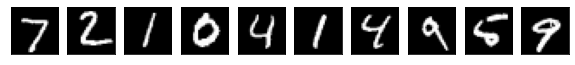

Reconstructed Image:


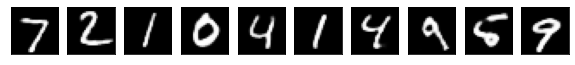

In [ ]:
import matplotlib.pyplot as plt
reconstruction = autoencoder.predict(X_test)
n = 10  # how many digits we will display
print("TEST DATA AS INPUT:")
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print("Reconstructed Image:")

plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(reconstruction[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Calculating the Reconstruction Loss
loss = mean_squared_error(X_test, reconstruction, squared=False)
rloss_logger.add_row([3,"64 features using Deeper AutoEncoder", loss])
print(rloss_logger)

+------+---------------------------------------+--------------------------+
| Sno. |                 Method                | Reconstruction RMSE loss |
+------+---------------------------------------+--------------------------+
|  1   |     32 features using AutoEncoders    |   0.27144135456914786    |
|  2   | 32 features using Deeper AutoEncoders |   0.06131296602409017    |
|  3   |  64 features using Deeper AutoEncoder |   0.04732058406104388    |
+------+---------------------------------------+--------------------------+


With more features we can see that the RMSE loss is reduced.

Now using the AE we create our encoder.

In [ ]:
encoder = Model(input_img, encoded) # Building the encoder from trained AE
encoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
Total params: 242,112
Trainable params: 242,112
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train_encode = encoder.predict(X_train) # encode the train data
X_test_encode = encoder.predict(X_test) # encode the test data

###Logistic Regression

In [ ]:
model = LogisticRegression() # define the model
model.fit(X_train_encode, y_train) # fit the model on the training set
yhat = model.predict(X_test_encode) # make predictions on the test set
acc = accuracy_score(y_test, yhat)
recall = recall_score(y_test, yhat, average = 'micro')
precision = precision_score(y_test, yhat, average = 'micro')
f1 = f1_score(y_test, yhat, average = 'micro')
accuracy_logger.add_row([4,"64 features using Deeper AutoEncoder", acc,  recall, precision, f1])
print(accuracy_logger)

+------+---------------------------------------+----------------+--------------+-----------------+----------+
| Sno. |                 Method                | Accuracy Score | Recall Score | Precision Score | F1 Score |
+------+---------------------------------------+----------------+--------------+-----------------+----------+
|  1   |           784 (all)features           |     0.9258     |    0.9258    |      0.9258     |  0.9258  |
|  2   |     32 features using AutoEncoders    |     0.7046     |    0.7046    |      0.7046     |  0.7046  |
|  3   | 32 features using Deeper AutoEncoders |     0.9011     |    0.9011    |      0.9011     |  0.9011  |
|  4   |  64 features using Deeper AutoEncoder |     0.9128     |    0.9128    |      0.9128     |  0.9128  |
+------+---------------------------------------+----------------+--------------+-----------------+----------+


Text(0.5, 1.0, 'Confusion matrix for 64 features using AutoEncoders')

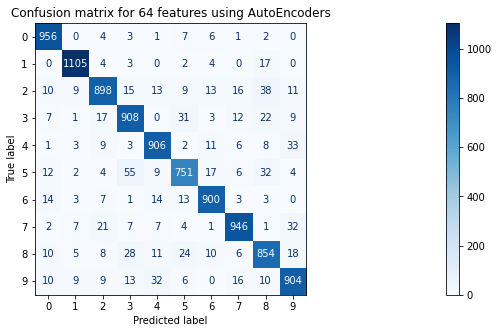

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,5)

class_names = [str(x) for x in range(10)]

disp = ConfusionMatrixDisplay.from_estimator(model,X_test_encode,y_test,display_labels=class_names,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix for 64 features using AutoEncoders")

Now with a higher number if features we can see that the accuracy increases.

## 5. Autoencoder - 128 output features
Here, we consider a AE which has 3 layers. All of the layers of encoding have ReLu activation function. We go from 784 features as the input to a input layer that has 512 outputs, these hidden 512 outputs are given to the 2nd layer with an 216 outputs and finally a output layer for the encoder with 128 features of the final data.

In [ ]:
input_img = Input(shape=(784,))

encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(216, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded) # <-- bottleneck

decoded = Dense(216, activation='relu')(encoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 216)               110808    
                                                                 
 dense_16 (Dense)            (None, 128)               27776     
                                                                 
 dense_17 (Dense)            (None, 216)               27864     
                                                                 
 dense_18 (Dense)            (None, 512)               111104    
                                                                 
 dense_19 (Dense)            (None, 784)               4021

We will now compile the model with a adam optimizer. It uses 2 gradient descent methods, Momentum and Root Mean Square Propagation.

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
autoencoder.fit(X_train,X_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test,X_test),
                callbacks =[earlystopping])

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1536 - val_loss: 0.1017
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0951 - val_loss: 0.0878
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0861 - val_loss: 0.0826
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0818 - val_loss: 0.0796
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0792 - val_loss: 0.0778
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0775 - val_loss: 0.0761
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0761 - val_loss: 0.0749
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0749 - val_loss: 0.0743
Epoch 9/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0740 - val_loss: 0.0736
Epoch 10/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0732 - val_lo

###Reconstruction

TEST DATA AS INPUT:


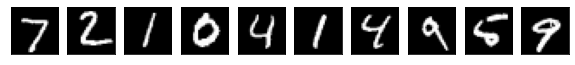

Reconstructed Image:


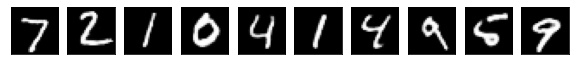

In [ ]:
import matplotlib.pyplot as plt
reconstruction = autoencoder.predict(X_test)
n = 10  # how many digits we will display
print("TEST DATA AS INPUT:")
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print("Reconstructed Image:")

plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(reconstruction[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Calculating the Reconstruction Loss
loss = mean_squared_error(X_test, reconstruction, squared=False)
rloss_logger.add_row([4,"128 features using Deeper AutoEncoder", loss])
print(rloss_logger)

+------+---------------------------------------+--------------------------+
| Sno. |                 Method                | Reconstruction RMSE loss |
+------+---------------------------------------+--------------------------+
|  1   |     32 features using AutoEncoders    |   0.27144135456914786    |
|  2   | 32 features using Deeper AutoEncoders |   0.06131296602409017    |
|  3   |  64 features using Deeper AutoEncoder |   0.04732058406104388    |
|  4   | 128 features using Deeper AutoEncoder |   0.03664464837220345    |
+------+---------------------------------------+--------------------------+


We can see that with more features the RMSE score decreases.

In [ ]:
encoder = Model(input_img, encoded) # Building the encoder from trained AE
encoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 216)               110808    
                                                                 
 dense_16 (Dense)            (None, 128)               27776     
                                                                 
Total params: 540,504
Trainable params: 540,504
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train_encode = encoder.predict(X_train) # encode the train data
X_test_encode = encoder.predict(X_test) # encode the test data

###Logistic Regression

In [ ]:
model = LogisticRegression() # define the model
model.fit(X_train_encode, y_train) # fit the model on the training set
yhat = model.predict(X_test_encode) # make predictions on the test set
acc = accuracy_score(y_test, yhat)
recall = recall_score(y_test, yhat, average = 'micro')
precision = precision_score(y_test, yhat, average = 'micro')
f1 = f1_score(y_test, yhat, average = 'micro')
accuracy_logger.add_row([5,"128 features using Deeper AutoEncoder", acc,  recall, precision, f1])
print(accuracy_logger)

+------+---------------------------------------+----------------+--------------+-----------------+----------+
| Sno. |                 Method                | Accuracy Score | Recall Score | Precision Score | F1 Score |
+------+---------------------------------------+----------------+--------------+-----------------+----------+
|  1   |           784 (all)features           |     0.9258     |    0.9258    |      0.9258     |  0.9258  |
|  2   |     32 features using AutoEncoders    |     0.7046     |    0.7046    |      0.7046     |  0.7046  |
|  3   | 32 features using Deeper AutoEncoders |     0.9011     |    0.9011    |      0.9011     |  0.9011  |
|  4   |  64 features using Deeper AutoEncoder |     0.9128     |    0.9128    |      0.9128     |  0.9128  |
|  5   | 128 features using Deeper AutoEncoder |     0.9205     |    0.9205    |      0.9205     |  0.9205  |
+------+---------------------------------------+----------------+--------------+-----------------+----------+


Text(0.5, 1.0, 'Confusion matrix for 128 features using AutoEncoders')

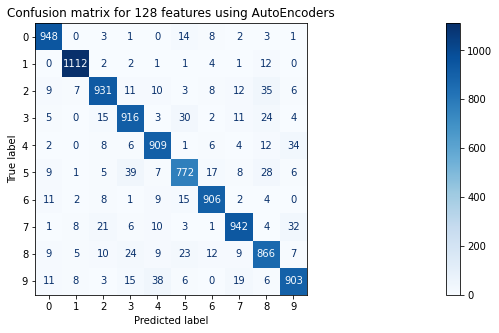

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,5)

class_names = [str(x) for x in range(10)]

disp = ConfusionMatrixDisplay.from_estimator(model,X_test_encode,y_test,display_labels=class_names,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix for 128 features using AutoEncoders")

We can see now that more features we get better accuracy but we can also see that reduced dimensionality are very close to the full features.

## PCA

In [ ]:
pca = PCA(2)
pca.fit(X_train)
train= pca.transform(X_train) # train has reduced X_train features
test = pca.transform(X_test) # test has reduced X_test features
approximation = pca.inverse_transform(test)

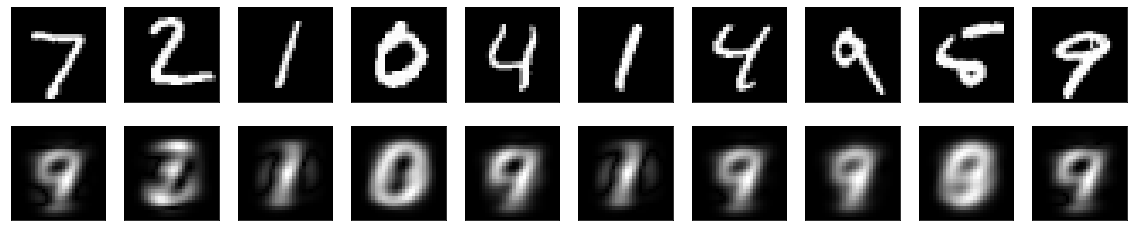

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(np.abs(approximation[i]).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Calculating the Reconstruction Loss
loss = mean_squared_error(X_test, approximation, squared=False)
rloss_logger.add_row([5,"2 features using PCA", loss])
print(rloss_logger)

+------+---------------------------------------+--------------------------+
| Sno. |                 Method                | Reconstruction RMSE loss |
+------+---------------------------------------+--------------------------+
|  1   |     32 features using AutoEncoders    |   0.27144135456914786    |
|  2   | 32 features using Deeper AutoEncoders |   0.06131296602409017    |
|  3   |  64 features using Deeper AutoEncoder |   0.04732058406104388    |
|  4   | 128 features using Deeper AutoEncoder |   0.03664464837220345    |
|  5   |          2 features using PCA         |    0.1761845664148683    |
+------+---------------------------------------+--------------------------+


In [ ]:
model = LogisticRegression() # define the model
model.fit(train, y_train) # fit the model on the training set
yhat = model.predict(test) # make predictions on the test set
acc = accuracy_score(y_test, yhat)
recall = recall_score(y_test, yhat, average = 'micro')
precision = precision_score(y_test, yhat, average = 'micro')
f1 = f1_score(y_test, yhat, average = 'micro')
accuracy_logger.add_row([6,"2 features using PCA", acc,  recall, precision, f1])
print(accuracy_logger)

+------+---------------------------------------+----------------+--------------+-----------------+----------+
| Sno. |                 Method                | Accuracy Score | Recall Score | Precision Score | F1 Score |
+------+---------------------------------------+----------------+--------------+-----------------+----------+
|  1   |           784 (all)features           |     0.9258     |    0.9258    |      0.9258     |  0.9258  |
|  2   |     32 features using AutoEncoders    |     0.7046     |    0.7046    |      0.7046     |  0.7046  |
|  3   | 32 features using Deeper AutoEncoders |     0.9011     |    0.9011    |      0.9011     |  0.9011  |
|  4   |  64 features using Deeper AutoEncoder |     0.9128     |    0.9128    |      0.9128     |  0.9128  |
|  5   | 128 features using Deeper AutoEncoder |     0.9205     |    0.9205    |      0.9205     |  0.9205  |
|  6   |          2 features using PCA         |     0.4462     |    0.4462    |      0.4462     |  0.4462  |
+------+--

Text(0.5, 1.0, 'Confusion matrix for 2 features using PCA')

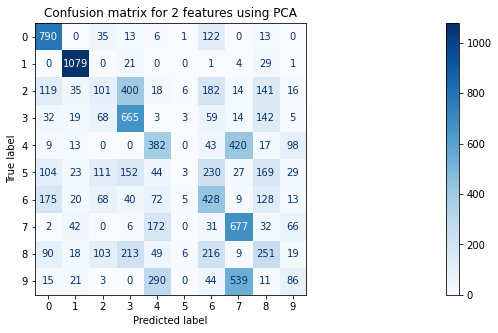

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,5)

class_names = [str(x) for x in range(10)]

disp = ConfusionMatrixDisplay.from_estimator(model,test,y_test,display_labels=class_names,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix for 2 features using PCA")

## 6. PCA - 32 output features

Since we have AE for 32, 64 and 128 features. Let us see how Linear transformation process works with a final of these same values.

In [ ]:
pca = PCA(32)
pca.fit(X_train)
train= pca.transform(X_train) # train has reduced X_train features
test = pca.transform(X_test) # test has reduced X_test features
approximation = pca.inverse_transform(test)

###Reconstruction

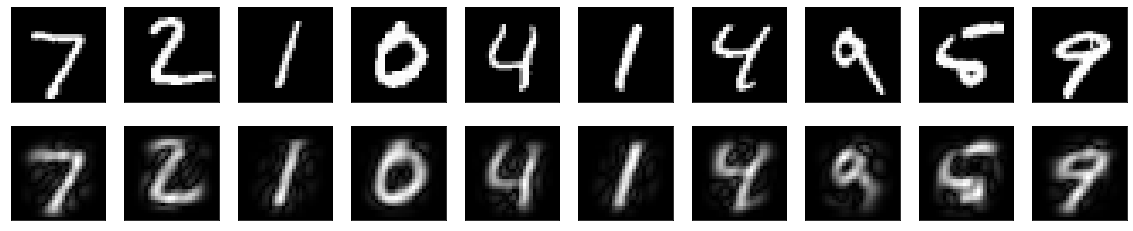

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(np.abs(approximation[i]).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Calculating the Reconstruction Loss
loss = mean_squared_error(X_test, approximation, squared=False)
rloss_logger.add_row([5,"32 features using PCA", loss])
print(rloss_logger)

+------+---------------------------------------+--------------------------+
| Sno. |                 Method                | Reconstruction RMSE loss |
+------+---------------------------------------+--------------------------+
|  1   |     32 features using AutoEncoders    |   0.27144135456914786    |
|  2   | 32 features using Deeper AutoEncoders |   0.06131296602409017    |
|  3   |  64 features using Deeper AutoEncoder |   0.04732058406104388    |
|  4   | 128 features using Deeper AutoEncoder |   0.03664464837220345    |
|  5   |          2 features using PCA         |    0.1761845664148683    |
|  5   |         32 features using PCA         |   0.10378908656490034    |
+------+---------------------------------------+--------------------------+


Even though PCA is a linear transformation the RMSE is very close to that for the 32 features with Deep AE with 32 features

### Logistic Regression

In [ ]:
model = LogisticRegression() # define the model
model.fit(train, y_train) # fit the model on the training set
yhat = model.predict(test) # make predictions on the test set
acc = accuracy_score(y_test, yhat)
recall = recall_score(y_test, yhat, average = 'micro')
precision = precision_score(y_test, yhat, average = 'micro')
f1 = f1_score(y_test, yhat, average = 'micro')
accuracy_logger.add_row([6,"32 features using PCA", acc,  recall, precision, f1])
print(accuracy_logger)

+------+---------------------------------------+----------------+--------------+-----------------+----------+
| Sno. |                 Method                | Accuracy Score | Recall Score | Precision Score | F1 Score |
+------+---------------------------------------+----------------+--------------+-----------------+----------+
|  1   |           784 (all)features           |     0.9258     |    0.9258    |      0.9258     |  0.9258  |
|  2   |     32 features using AutoEncoders    |     0.7046     |    0.7046    |      0.7046     |  0.7046  |
|  3   | 32 features using Deeper AutoEncoders |     0.9011     |    0.9011    |      0.9011     |  0.9011  |
|  4   |  64 features using Deeper AutoEncoder |     0.9128     |    0.9128    |      0.9128     |  0.9128  |
|  5   | 128 features using Deeper AutoEncoder |     0.9205     |    0.9205    |      0.9205     |  0.9205  |
|  6   |          2 features using PCA         |     0.4462     |    0.4462    |      0.4462     |  0.4462  |
|  6   |  

Text(0.5, 1.0, 'Confusion matrix for 32 features using PCA')

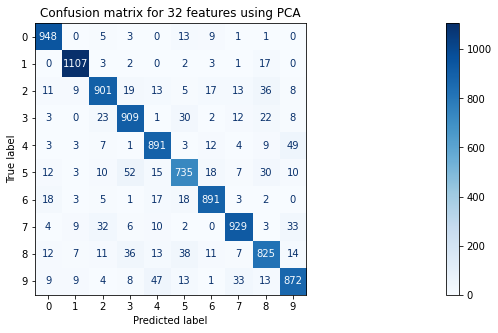

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,5)

class_names = [str(x) for x in range(10)]

disp = ConfusionMatrixDisplay.from_estimator(model,test,y_test,display_labels=class_names,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix for 32 features using PCA")

## 7. PCA - 64 output features

Let us observe how more features with PCA affects the results. We are considering 64 here.

In [ ]:
pca = PCA(64)
pca.fit(X_train)
train= pca.transform(X_train) # train has reduced X_train features
test = pca.transform(X_test) # test has reduced X_test features
approximation = pca.inverse_transform(test)

###Reconstruction

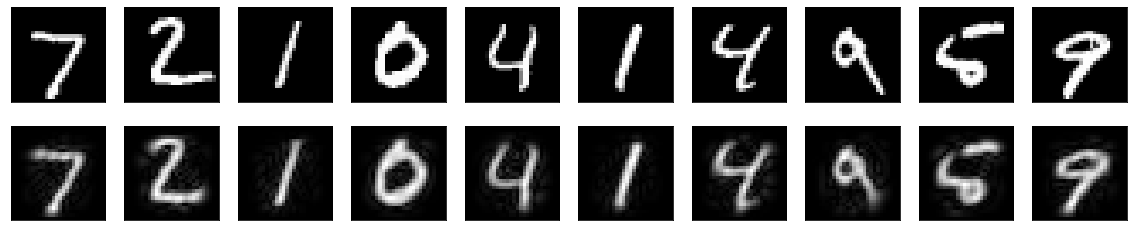

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(np.abs(approximation[i]).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Calculating the Reconstruction Loss
loss = mean_squared_error(X_test, approximation, squared=False)
rloss_logger.add_row([6,"64 features using PCA", loss])
print(rloss_logger)

+------+---------------------------------------+--------------------------+
| Sno. |                 Method                | Reconstruction RMSE loss |
+------+---------------------------------------+--------------------------+
|  1   |     32 features using AutoEncoders    |   0.27144135456914786    |
|  2   | 32 features using Deeper AutoEncoders |   0.06131296602409017    |
|  3   |  64 features using Deeper AutoEncoder |   0.04732058406104388    |
|  4   | 128 features using Deeper AutoEncoder |   0.03664464837220345    |
|  5   |          2 features using PCA         |    0.1761845664148683    |
|  5   |         32 features using PCA         |   0.10378908656490034    |
|  6   |         64 features using PCA         |   0.07824114755870656    |
+------+---------------------------------------+--------------------------+


In [ ]:
model = LogisticRegression() # define the model
model.fit(train, y_train) # fit the model on the training set
yhat = model.predict(test) # make predictions on the test set
acc = accuracy_score(y_test, yhat)
recall = recall_score(y_test, yhat, average = 'micro')
precision = precision_score(y_test, yhat, average = 'micro')
f1 = f1_score(y_test, yhat, average = 'micro')
accuracy_logger.add_row([7,"64 features using PCA", acc,  recall, precision, f1])
print(accuracy_logger)

+------+---------------------------------------+----------------+--------------+-----------------+--------------------+
| Sno. |                 Method                | Accuracy Score | Recall Score | Precision Score |      F1 Score      |
+------+---------------------------------------+----------------+--------------+-----------------+--------------------+
|  1   |           784 (all)features           |     0.9258     |    0.9258    |      0.9258     |       0.9258       |
|  2   |     32 features using AutoEncoders    |     0.7046     |    0.7046    |      0.7046     |       0.7046       |
|  3   | 32 features using Deeper AutoEncoders |     0.9011     |    0.9011    |      0.9011     |       0.9011       |
|  4   |  64 features using Deeper AutoEncoder |     0.9128     |    0.9128    |      0.9128     |       0.9128       |
|  5   | 128 features using Deeper AutoEncoder |     0.9205     |    0.9205    |      0.9205     |       0.9205       |
|  6   |          2 features using PCA  

Text(0.5, 1.0, 'Confusion matrix for 64 features using PCA')

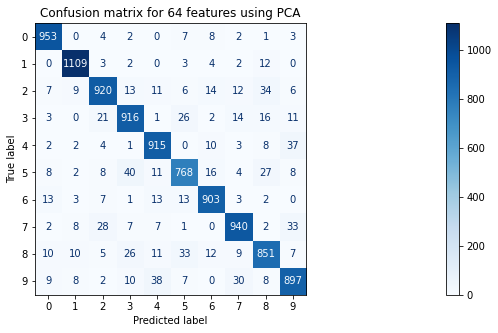

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,5)

class_names = [str(x) for x in range(10)]

disp = ConfusionMatrixDisplay.from_estimator(model,test,y_test,display_labels=class_names,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix for 64 features using PCA")

## 8. PCA - 128 output features

Lastly we will look at PCA for 128 features. Let us see how AE and PCA compare for this.

In [ ]:
pca = PCA(128)
pca.fit(X_train)
train= pca.transform(X_train) # train has reduced X_train features
test = pca.transform(X_test) # test has reduced X_test features
approximation = pca.inverse_transform(test)

###Reconstruction

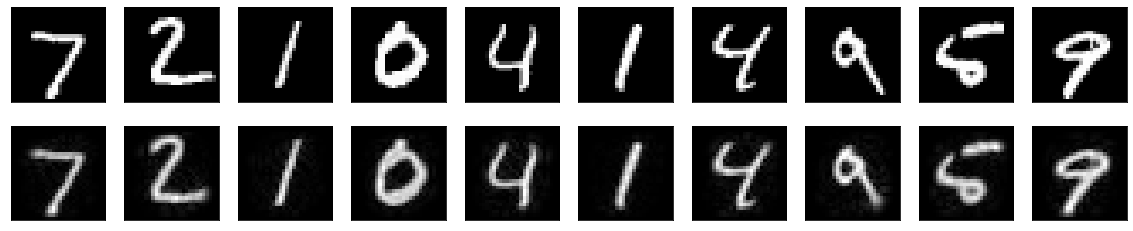

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(np.abs(approximation[i]).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Calculating the Reconstruction Loss
loss = mean_squared_error(X_test, approximation, squared=False)
rloss_logger.add_row([7,"128 features using PCA", loss])
print(rloss_logger)

+------+---------------------------------------+--------------------------+
| Sno. |                 Method                | Reconstruction RMSE loss |
+------+---------------------------------------+--------------------------+
|  1   |     32 features using AutoEncoders    |   0.27144135456914786    |
|  2   | 32 features using Deeper AutoEncoders |   0.06131296602409017    |
|  3   |  64 features using Deeper AutoEncoder |   0.04732058406104388    |
|  4   | 128 features using Deeper AutoEncoder |   0.03664464837220345    |
|  5   |          2 features using PCA         |    0.1761845664148683    |
|  5   |         32 features using PCA         |   0.10378908656490034    |
|  6   |         64 features using PCA         |   0.07824114755870656    |
|  7   |         128 features using PCA        |   0.054815220777220675   |
+------+---------------------------------------+--------------------------+


###Logistic Regression

In [ ]:
model = LogisticRegression() # define the model
model.fit(train, y_train) # fit the model on the training set
yhat = model.predict(test) # make predictions on the test set
acc = accuracy_score(y_test, yhat)
recall = recall_score(y_test, yhat, average = 'micro')
precision = precision_score(y_test, yhat, average = 'micro')
f1 = f1_score(y_test, yhat, average = 'micro')
accuracy_logger.add_row([8,"128 features using PCA", acc,  recall, precision, f1])
print(accuracy_logger)

+------+---------------------------------------+----------------+--------------+-----------------+--------------------+
| Sno. |                 Method                | Accuracy Score | Recall Score | Precision Score |      F1 Score      |
+------+---------------------------------------+----------------+--------------+-----------------+--------------------+
|  1   |           784 (all)features           |     0.9258     |    0.9258    |      0.9258     |       0.9258       |
|  2   |     32 features using AutoEncoders    |     0.7046     |    0.7046    |      0.7046     |       0.7046       |
|  3   | 32 features using Deeper AutoEncoders |     0.9011     |    0.9011    |      0.9011     |       0.9011       |
|  4   |  64 features using Deeper AutoEncoder |     0.9128     |    0.9128    |      0.9128     |       0.9128       |
|  5   | 128 features using Deeper AutoEncoder |     0.9205     |    0.9205    |      0.9205     |       0.9205       |
|  6   |          2 features using PCA  

Text(0.5, 1.0, 'Confusion matrix for 128 features using PCA')

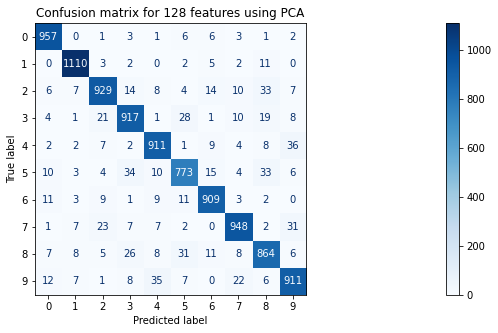

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,5)

class_names = [str(x) for x in range(10)]

disp = ConfusionMatrixDisplay.from_estimator(model,test,y_test,display_labels=class_names,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix for 128 features using PCA")

### Comparsion of Performance using different metrics

In [ ]:
print(accuracy_logger)

+------+---------------------------------------+----------------+--------------+-----------------+--------------------+
| Sno. |                 Method                | Accuracy Score | Recall Score | Precision Score |      F1 Score      |
+------+---------------------------------------+----------------+--------------+-----------------+--------------------+
|  1   |           784 (all)features           |     0.9258     |    0.9258    |      0.9258     |       0.9258       |
|  2   |     32 features using AutoEncoders    |     0.7046     |    0.7046    |      0.7046     |       0.7046       |
|  3   | 32 features using Deeper AutoEncoders |     0.9011     |    0.9011    |      0.9011     |       0.9011       |
|  4   |  64 features using Deeper AutoEncoder |     0.9128     |    0.9128    |      0.9128     |       0.9128       |
|  5   | 128 features using Deeper AutoEncoder |     0.9205     |    0.9205    |      0.9205     |       0.9205       |
|  6   |          2 features using PCA  

#Conclusion:
1. As we can clearly see that in this dataset, AE is performing better in feature extraction in both ways, i.e. in predicting the target variable, and also as a reliable feature compression to reconstruct the original features. This is seen as there's significant improvement in reconstruction loss, whereas it gives an almost identical/better accuracy/precision/recall and f1 score.

2. We noticed that only using the first 2 Principal components in PCA, all the metrics gave a very poor performance, close to 44%. We noticed that on increasing the number of Principal Components to 32 the performance metrics go up to 90%, which means an improvement of over 46%. 

3. We also confirmed our hypothesis that PCA can effectively capture the latent features of the data, just like AutoEncoders, and thus compared their results on various sizes of reduced dimensions, to note the similarities and differences in the results of PCA and AutoEncoders in feature reduction, and image compression.

4. As the number of features to reduce to; were increased, their accuracy went up and approached the accuracy of applying logistic regression on all the 784 features. But at the same time, we noticed a significant reduction in the reconstruction RMSE loss using AutoEncoders, than PCA.

# Summary and References:
This tutorial highlighted how PCA and AE compare as dimensionality reduction processes. We can also see how the layers of AE affect its result.
1.   PCA: https://www.sartorius.com/en/knowledge/science-snippets/what-is-principal-component-analysis-pca-and-how-it-is-used-507186
2.   Dimensionality reduction: https://medium.com/@ee18m003/autoencoder-and-pca-for-dimensionality-reduction-on-mnist-dataset-with-code-dace21d87432
3.   Linear, non-Linear: https://towardsdatascience.com/autoencoders-vs-pca-when-to-use-which-73de063f5d7
4.   Linear, non-Linear viz: https://towardsdatascience.com/finding-and-visualising-non-linear-relationships-4ecd63a43e7e